# Correlation of distance traveled and fuel consumed

In [3]:
from strym import strymread
import strym
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

## Read the Honda Pilot Dataset

In [4]:
data = "../../PandaData/2020_04_30/2020-04-30-09-16-18_5FNYF6H05HB089022_CAN_Messages.csv"
dbcfile= "../examples/honda_pilot_touring_2017_can_generated.dbc"

In [5]:
r = strymread(csvfile=data, dbcfile=dbcfile)

## Read wheel speed

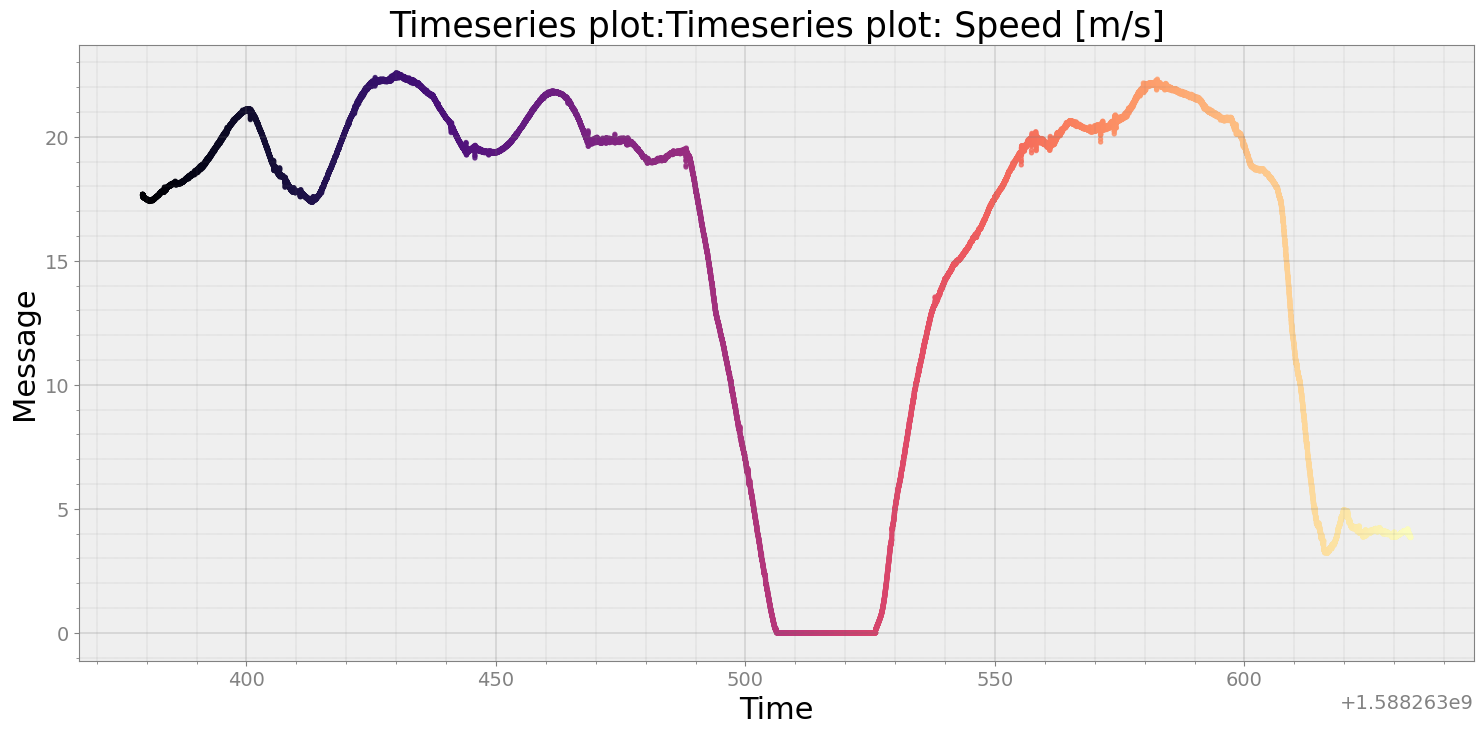

In [7]:
speed = r.speed()
speed['Message'] = speed['Message']*0.277778
strymread.plt_ts(speed, title="Timeseries plot: Speed [m/s]")

## Read Trip Fuel Consumed

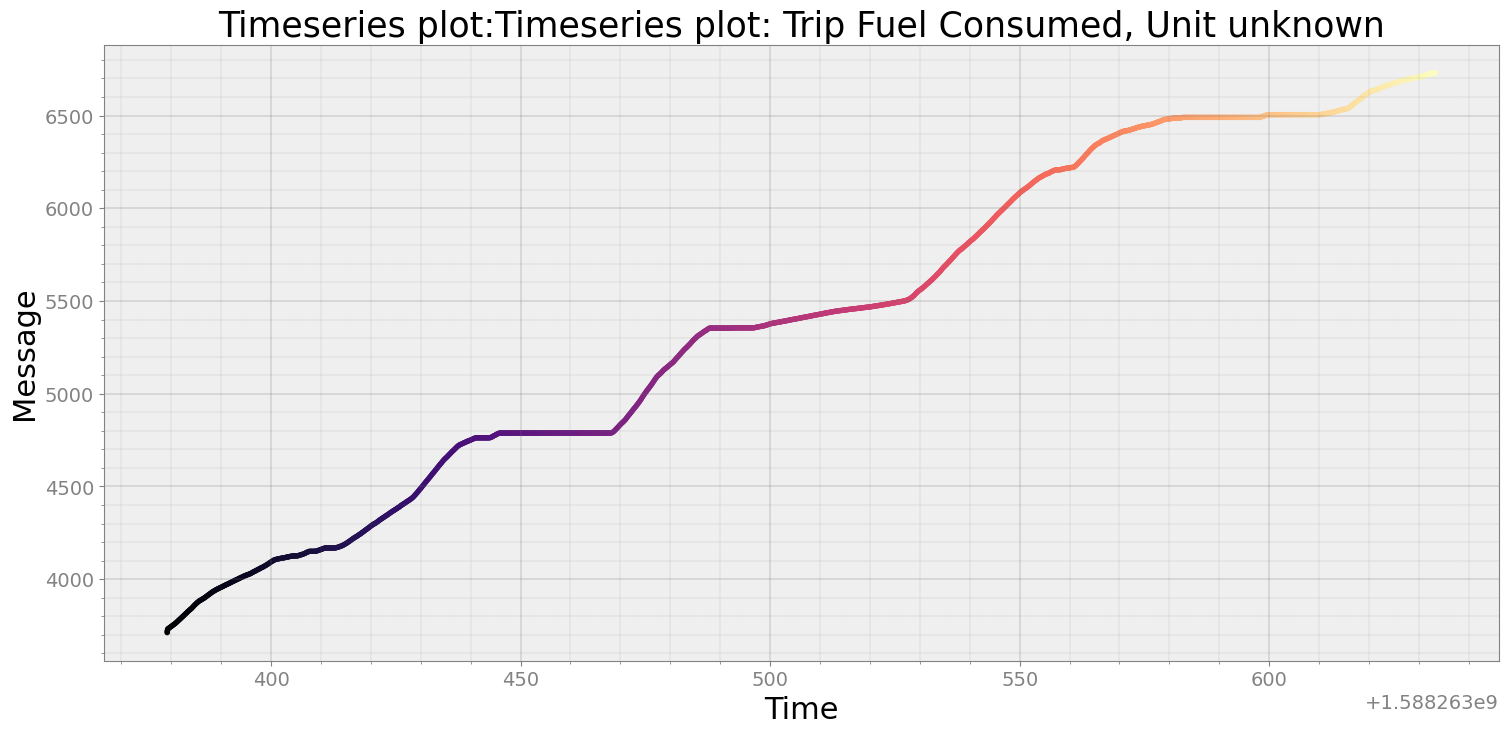

In [8]:
msgs804_2 = r.get_ts(804,2)
strymread.plt_ts(msgs804_2,  title="Timeseries plot: Trip Fuel Consumed, Unit unknown")

## Integrate speed to get total distance


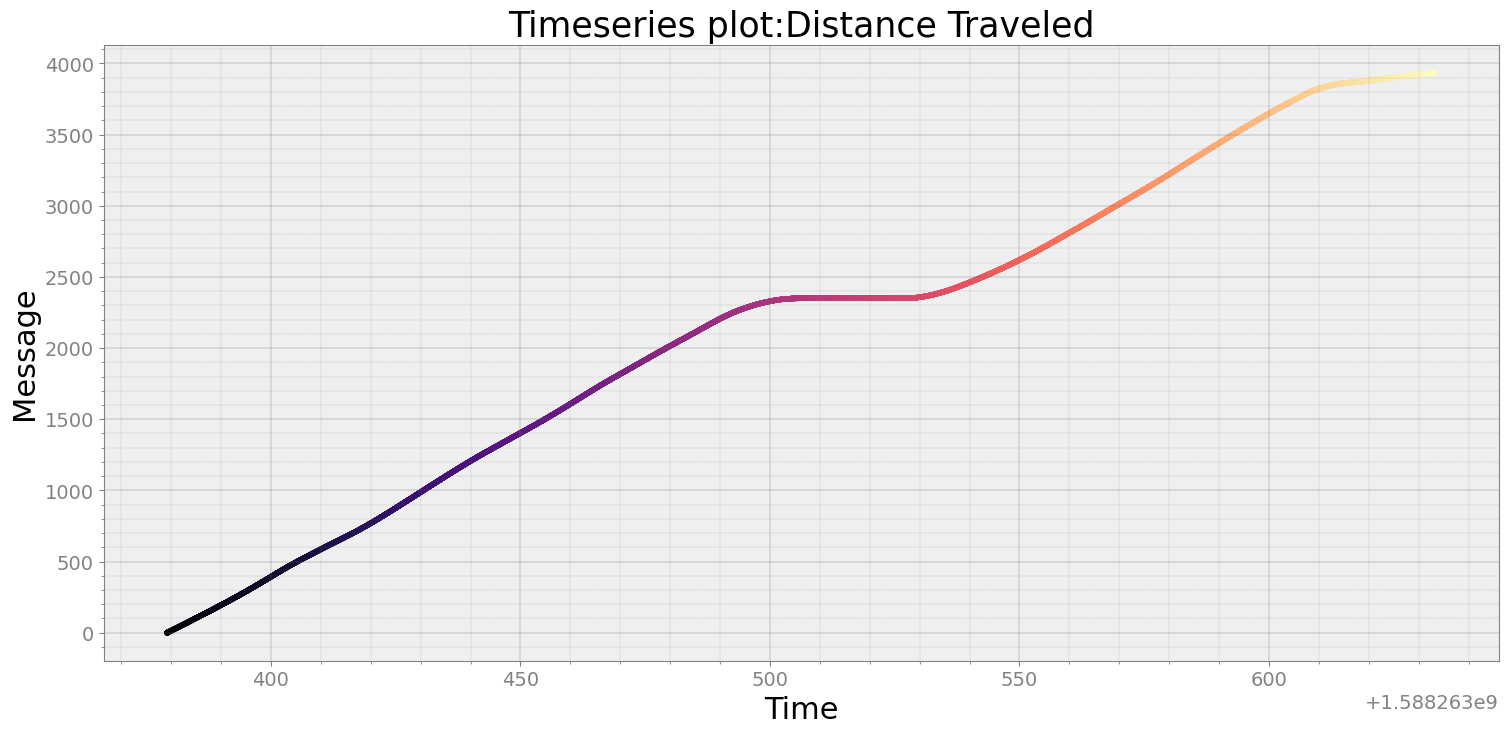

In [12]:
distance = strymread.integrate(speed)
distance.dropna(inplace=True)

strymread.plt_ts(distance, title = "Distance Traveled")

In [13]:
distance

,Time,Message
2020-04-30 16:16:19.190859079,1.588263e+09,0.000000
2020-04-30 16:16:19.191996098,1.588263e+09,0.020065
2020-04-30 16:16:19.192753792,1.588263e+09,0.033430
2020-04-30 16:16:19.193773985,1.588263e+09,0.051425
2020-04-30 16:16:19.195368052,1.588263e+09,0.079556
...,...,...
2020-04-30 16:20:33.275126934,1.588264e+09,3934.963256
2020-04-30 16:20:33.285344839,1.588264e+09,3935.002624
2020-04-30 16:20:33.295157909,1.588264e+09,3935.040431
2020-04-30 16:20:33.305240154,1.588264e+09,3935.079276


## Scatterplot of correlation of total distance and fuel consumed

In [23]:
distance_resampled, msgs804_2_resampled = strymread.ts_sync(distance, msgs804_2, rate="second")

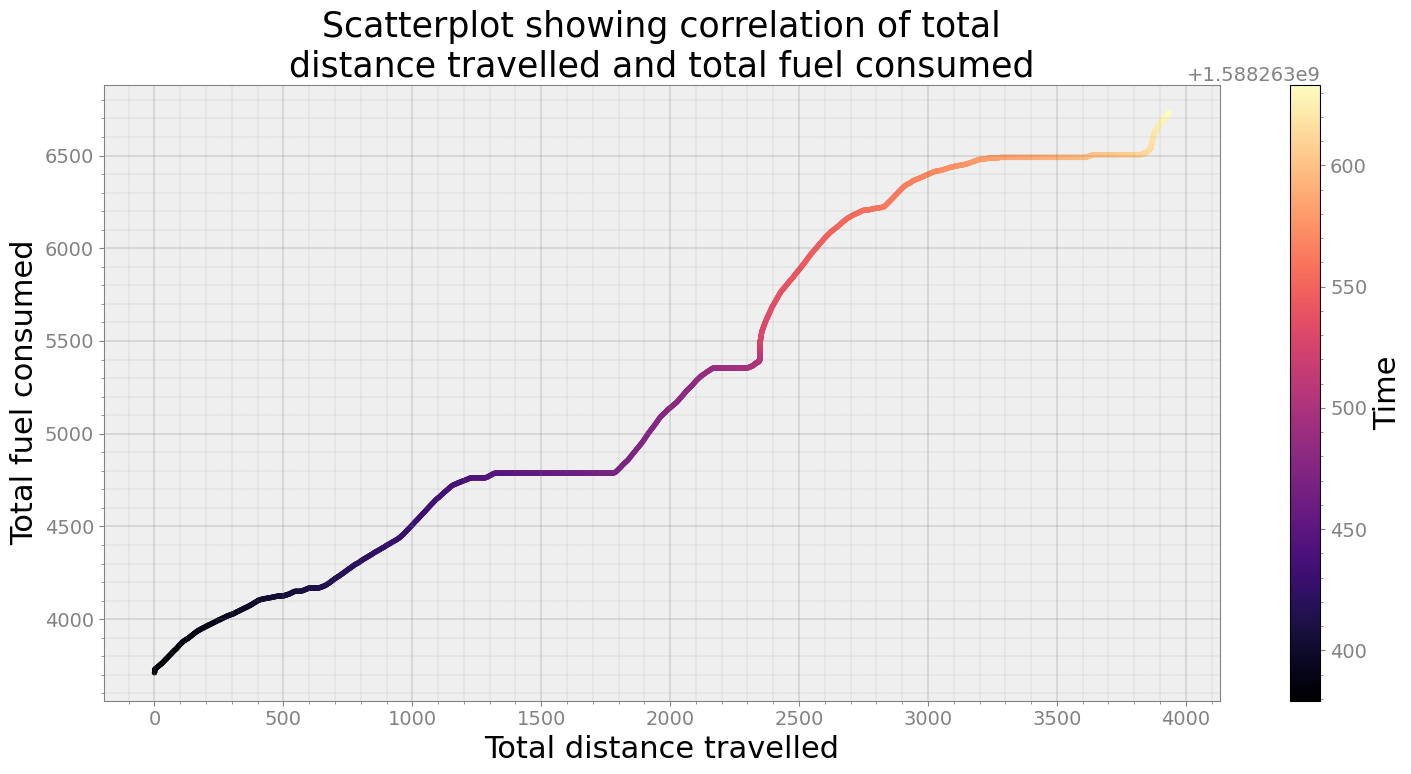

In [26]:
fig, ax = strymread.create_fig(1)
ax = ax[0]
ax.scatter(distance_resampled['Message'], msgs804_2_resampled['Message'], 
           c=distance_resampled['Time'], s = 8, cmap="magma")
cbr = fig.colorbar(im, ax=ax)
cbr.set_label("Time")
ax.set_title("Scatterplot showing correlation of total\ndistance travelled and total fuel consumed")
ax.set_xlabel("Total distance travelled")
ax.set_ylabel("Total fuel consumed")
plt.show()

In [25]:
distance_resampled['Message'].corr(msgs804_2_resampled['Message'])

0.9830666406297385